## Front-back normalization

In [1]:
#include "cali.h"

In [2]:
//get data from sort00335.root file
TFile *ipf = new TFile("~/data/FBcalibration/sort00335.root");
TTree *tree = (TTree*)ipf->Get("tree");
TCanvas *c1=new TCanvas("c1","c1");
tree->SetBranchAddress("xhit",&xhit);
tree->SetBranchAddress("yhit",&yhit);
tree->SetBranchAddress("x",&x);
tree->SetBranchAddress("y",&y);
tree->SetBranchAddress("xe",&xe);
tree->SetBranchAddress("ye",&ye);
tree->SetBranchAddress("mwe",&mwe);
tree->SetBranchAddress("ve",&ve);
tree->SetBranchAddress("xt",&xt);
tree->SetBranchAddress("yt",&yt);
tree->SetBranchAddress("mwt",&mwt);
tree->SetBranchAddress("vt",&vt);
tree->Print();

******************************************************************************
*Tree    :tree      : tree                                                   *
*Entries :   206033 : Total =        37052814 bytes  File  Size =    6210616 *
*        :          : Tree compression factor =   5.97                       *
******************************************************************************
*Br    0 :xhit      : xhit/I                                                 *
*Entries :   206033 : Total  Size=     826799 bytes  File Size  =      31118 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=  26.54     *
*............................................................................*
*Br    1 :yhit      : yhit/I                                                 *
*Entries :   206033 : Total  Size=     826799 bytes  File Size  =      67478 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=  12.24     *
*...................................................

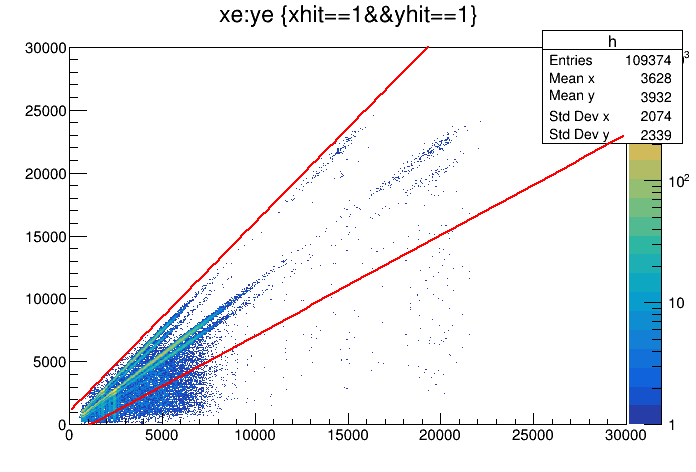

In [3]:
//front back correlation
tree->Draw("xe:ye>>h(500,0,30000,500,0,30000)","xhit==1&&yhit==1","colz");
c1->SetLogz();
c1->Draw();
TF1 *fup = new TF1("fup","[0]+[1]*x",0,30000);
TF1 *flow = new TF1("flow","[0]+[1]*x",0,30000);
fup->SetParameters(1000,1.5);
fup->Draw("same");
flow->SetParameters(-1000,0.8);
flow->Draw("same");

## counts of front-back 

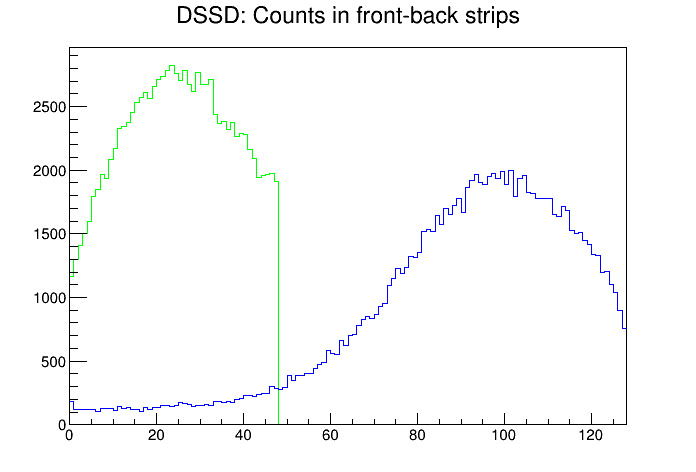

front: 24  back: 102


In [4]:
THStack *ths = new THStack("ths","DSSD: Counts in front-back strips");
tree->Draw("y>>hf(48,0,48)","xhit==1&&yhit==1");
tree->Draw("x>>hb(128,0,128)","xhit==1&&yhit==1");
hf->SetLineColor(3);
hb->SetLineColor(4);
ths->Add(hf);
ths->Add(hb);
ths->Draw("nostack");
c1->Draw();
Int_t cntx,cnty;
cnty=hf->GetMaximumBin();
cntx=hb->GetMaximumBin();
cout<<"front: "<<cnty<<"  back: "<<cntx<<endl;

In [5]:
TString stree,hname;
TString hcutall;
TGraph *grx[128],*grxc[128];
TH2F *hg[128];
TF1 *fp1= new TF1("fp1","pol1",50,30000);
fp1->SetLineColor(kGray);

In [6]:
Double_t par[2];
int ys=cnty;
int xs=cntx;
int xmax[128];
TString sdx,sdy,sdx1,sdy1;

## fitting and write histogram in subdirectory

In [7]:
for(Int_t i=90;i<96;i++) {
    c1->Clear();
    sdx.Form("xe[0]");//d1x[ix]
    sdy.Form("ye[0]");//d1y[ys]
    stree.Form("ye:xe>>hg%03d(1000,0,20000,1000,0,20000)",i);
    //cut for approaciate x-y range for a selected DSSD
    TString hcut;
    //cut for crosstalk veto
    hcut.Form("xe[0]>50&&ye[0]>50&&xhit==1&&yhit==1&&x[0]==%d&&y[0]==%d",i,5);
    hname.Form("hg%03d",i);
    tree->Draw(stree.Data(),hcut.Data());
    hg[i]=(TH2F*) gROOT->FindObject(hname);
    grx[i] = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
    //grx[i]->Draw();
    //hg[i]->Fit(fp1,"ROB");
    //c1->SetLogz();
    //c1->Draw();
    //new TGraphs with refined cut range.
    grxc[i]=new TGraph;
    int ng=0;
    xmax[i]=0;
    if(grx[i]->GetN()>20) {
        grx[i]->Fit(fp1,"Q ROB");
        fp1->GetParameters(&par[0]);
        for(int k=0; k<grx[i]->GetN(); k++) {
            double x=grx[i]->GetX()[k];
            double y=grx[i]->GetY()[k];
            if (abs(y-(par[0]+par[1]*x))<20) {
                grxc[i]->SetPoint(ng,x,y);
                if(x>xmax[i]) xmax[i]=x;
                ng++;
            }
        }
    }
    cout<<"dssd = "<<i<<" ,     Nc="<<grxc[i]->GetN()<<" ,     xmax= "<<xmax[i]<<endl;
}


dssd = 90 ,     Nc=20 ,     xmax= 8091
dssd = 91 ,     Nc=16 ,     xmax= 7571
dssd = 92 ,     Nc=35 ,     xmax= 9334
dssd = 93 ,     Nc=22 ,     xmax= 7502
dssd = 94 ,     Nc=23 ,     xmax= 7972
dssd = 95 ,     Nc=26 ,     xmax= 9770


In [8]:
TFile *outfile = new TFile("out_hist.root","recreate");
TDirectory *folder;
folder = outfile->mkdir("hist");
folder->cd();
for(Int_t i=90;i<96;i++) {
    hg[i]->Write();
}
outfile->Close();

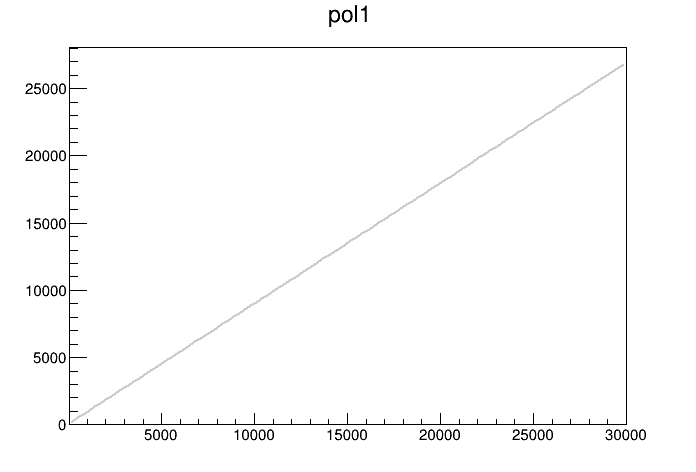

25

****************************************
Minimizer is Linear / Robust
Chi2                      =      272.026
NDf                       =           14
p0                        =       5.1596
p1                        =     0.895822


In [9]:
int i=91;
cout<<grx[i]->GetN()<<endl;
if(grx[i]->GetN()>20) {
    grx[i]->Fit(fp1,"ROB");
    fp1->Draw();
    //  grx[ix]->Draw("AP same");
    // grxc[ix]->Draw("AP same");
    hg[i]->Draw("same");
    c1->SetLogz();
    c1->Draw();
}

### 以正面第cnty条为基准，刻度x面的条，得到刻度系数，刻度使用二次多项式拟合

In [10]:
TF1 *fp2= new TF1("fp2","pol2",50,10000);
TString hresname,head,out;
double par2[128][3], chi2ndf[128];
ofstream fout("cali1x.txt");
TFile *hfout=new TFile("histout.root","RECREATE");
TDirectory *herrdir,*hstatdir;
hresdir=hfout->mkdir("hres");
hstatdir=hfout->mkdir("hstat");
TH2F *hres[128];
TH1F *hcount=new TH1F("hcount","Counts-strips for dssd", 128,0,128);
TH1F *hmaxval=new TH1F("hmaxval","maxVal-strips for dssd",128,0,128);
TH1F *hchi2ndf=new TH1F("hchi2ndf","chi2/ndf-strips for dssd",128,0,128);

In [11]:
head.Form("%4s%9s%11s%20s        %16s","i","p0","p1","p2","chi2/ndf");
cout<<head<<endl;
fout<<head<<endl;
for(int i=90;i<96;i++) {
    grxc[i]->Fit(fp2,"Q ROB");
    fp2->GetParameters(&par2[i][0]);
    //histogram
    hcount->Fill(i,grxc[i]->GetN());
    hmaxval->Fill(i,xmax[i]);
    chi2ndf[i]=fp2->GetChisquare()/fp2->GetNDF();
    hchi2ndf->Fill(i,chi2ndf[i]);
    hcount->SetDirectory(hstatdir);
    hmaxval->SetDirectory(hstatdir);
    hchi2ndf->SetDirectory(hstatdir);
    hcount->Sumw2(0);
    hmaxval->Sumw2(0);
    hchi2ndf->Sumw2(0);
    hresname.Form("hres%02d",i);
    hres[i] = new TH2F(hresname,hresname,100,-50,50,1000,200,8000);
    for(int j = 0;j < grx[i]->GetN(); j++){
        double x=grx[i]->GetX()[j];
        double y=grx[i]->GetY()[j];
        x = y-(par2[i][0]+par2[i][1]*x+par2[i][2]*x*x);
        hres[i]->Fill(x,y);
    }
    hres[i]->SetDirectory(hresdir);
    out.Form("%4d%9.2f%11.6f%20e%16.2f"  ,i  ,par2[i][0]  ,par2[i][1]  ,par2[i][2]  ,chi2ndf[i]);
    cout<<out<<endl;
    fout<<out<<endl;
}
hfout->Write();
hfout->Close();
fout.close();

   i       p0         p1                  p2                chi2/ndf
  90    -3.00   0.901444       -5.211602e-07           44.46
  91    46.87   0.872671        2.953229e-06          157.33
  92     3.70   0.873632        3.757796e-07           25.95
  93    17.23   0.885115        4.902790e-07           10.01
  94     4.72   0.890177        1.393734e-08           13.03
  95   -13.87   0.911456       -9.731559e-07           57.68
